<a href="https://colab.research.google.com/github/PanavShah1/Summer_of_Quant/blob/main/Moving_Average_Crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install yfinance
import yfinance as yf

In [3]:
company_ticker = "AAPL"

In [4]:
ticker = yf.Ticker(company_ticker)
hist = pd.DataFrame(ticker.history(period="max"))
hist.reset_index(inplace=True)
hist['Date'] = hist['Date'].dt.date
hist.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10981,2024-07-08,227.089996,227.850006,223.250000,227.820007,59085900,0.0,0.0
10982,2024-07-09,227.929993,229.399994,226.369995,228.679993,48076100,0.0,0.0
10983,2024-07-10,229.300003,233.080002,229.250000,232.979996,62627700,0.0,0.0
10984,2024-07-11,231.389999,232.389999,225.770004,227.570007,64516900,0.0,0.0
10985,2024-07-12,229.000000,232.397995,228.679993,231.720001,29994021,0.0,0.0


In [5]:
df = hist
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10981,2024-07-08,227.089996,227.850006,223.250000,227.820007,59085900,0.0,0.0
10982,2024-07-09,227.929993,229.399994,226.369995,228.679993,48076100,0.0,0.0
10983,2024-07-10,229.300003,233.080002,229.250000,232.979996,62627700,0.0,0.0
10984,2024-07-11,231.389999,232.389999,225.770004,227.570007,64516900,0.0,0.0
10985,2024-07-12,229.000000,232.397995,228.679993,231.720001,29994021,0.0,0.0


In [6]:
df = df[['Date', 'Close']]
df.tail()

,Date,Close
10981,2024-07-08,227.820007
10982,2024-07-09,228.679993
10983,2024-07-10,232.979996
10984,2024-07-11,227.570007
10985,2024-07-12,231.720001


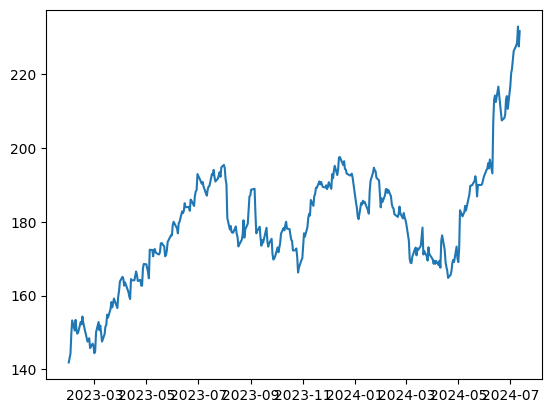

In [7]:
plt.plot(df['Date'][-365:], df['Close'][-365:])

In [8]:
smoothening = 10
days_1 = 50
days_2 = 100

In [9]:
def ema(close_values: list, days: int, smoothening: int):
  factor = smoothening / (days + 1)
  ema_values = []
  for i, close in enumerate(close_values):
    if i < days:
      ema_values.append(sum(close_values[: i+1]))
    else:
      ema_values.append(close_values[i] * factor + ema_values[i-1] * (1 - factor))
  return ema_values


In [10]:
ema_1 = ema(df['Close'], days_1, smoothening)
ema_1[-10:]

[210.3708111881828,
 211.62163252383326,
 213.31739169023086,
 214.9316292120989,
 217.1685639426463,
 219.25708225275855,
 221.10471174746888,
 223.4331988023846,
 224.24433772823443,
 225.71015409930675]

In [11]:
ema_2 = ema(df['Close'], days_2, smoothening)
ema_2[-10:]

[206.08235878678656,
 207.13856088710472,
 208.43870379654592,
 209.73685223765602,
 211.3807278911446,
 213.00837932016185,
 214.56002420685684,
 216.38378376336004,
 217.4913306505738,
 218.90010991494304]

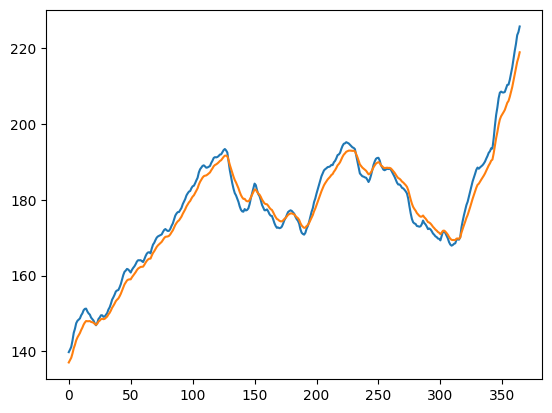

In [12]:
plt.plot(ema_1[-365:])
plt.plot(ema_2[-365:])

In [13]:
df['EMA_1'] = ema_1
df['EMA_2'] = ema_2
df.tail()

/var/folders/4j/xnkf0xg113jbh1s5hmzbf4lm0000gp/T/ipykernel_52408/1397234786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA_1'] = ema_1
/var/folders/4j/xnkf0xg113jbh1s5hmzbf4lm0000gp/T/ipykernel_52408/1397234786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA_2'] = ema_2


,Date,Close,EMA_1,EMA_2
10981,2024-07-08,227.820007,219.257082,213.008379
10982,2024-07-09,228.679993,221.104712,214.560024
10983,2024-07-10,232.979996,223.433199,216.383784
10984,2024-07-11,227.570007,224.244338,217.491331
10985,2024-07-12,231.720001,225.710154,218.900110


In [14]:
len(df)

10986

----- 1 -----
Buy on 2023-01-30 for 141.832
Sell on 2023-03-02 for 144.939
Profit : 3.107

----- 2 -----
Buy on 2023-03-03 for 150.025
Sell on 2023-08-04 for 181.029
Profit : 31.004

----- 3 -----
Buy on 2023-08-31 for 187.130
Sell on 2023-09-08 for 177.478
Profit : -9.652

----- 4 -----
Buy on 2023-10-11 for 179.092
Sell on 2023-10-20 for 172.199
Profit : -6.893

----- 5 -----
Buy on 2023-11-06 for 178.524
Sell on 2024-01-02 for 185.152
Profit : 6.628

----- 6 -----
Buy on 2024-01-23 for 194.667
Sell on 2024-01-31 for 183.916
Profit : -10.752

----- 7 -----
Buy on 2024-05-02 for 172.796
Sell on 2024-07-12 for 231.720
Profit : 58.924

--------------
Total profit : 72.368
Profit % : 51.024 %


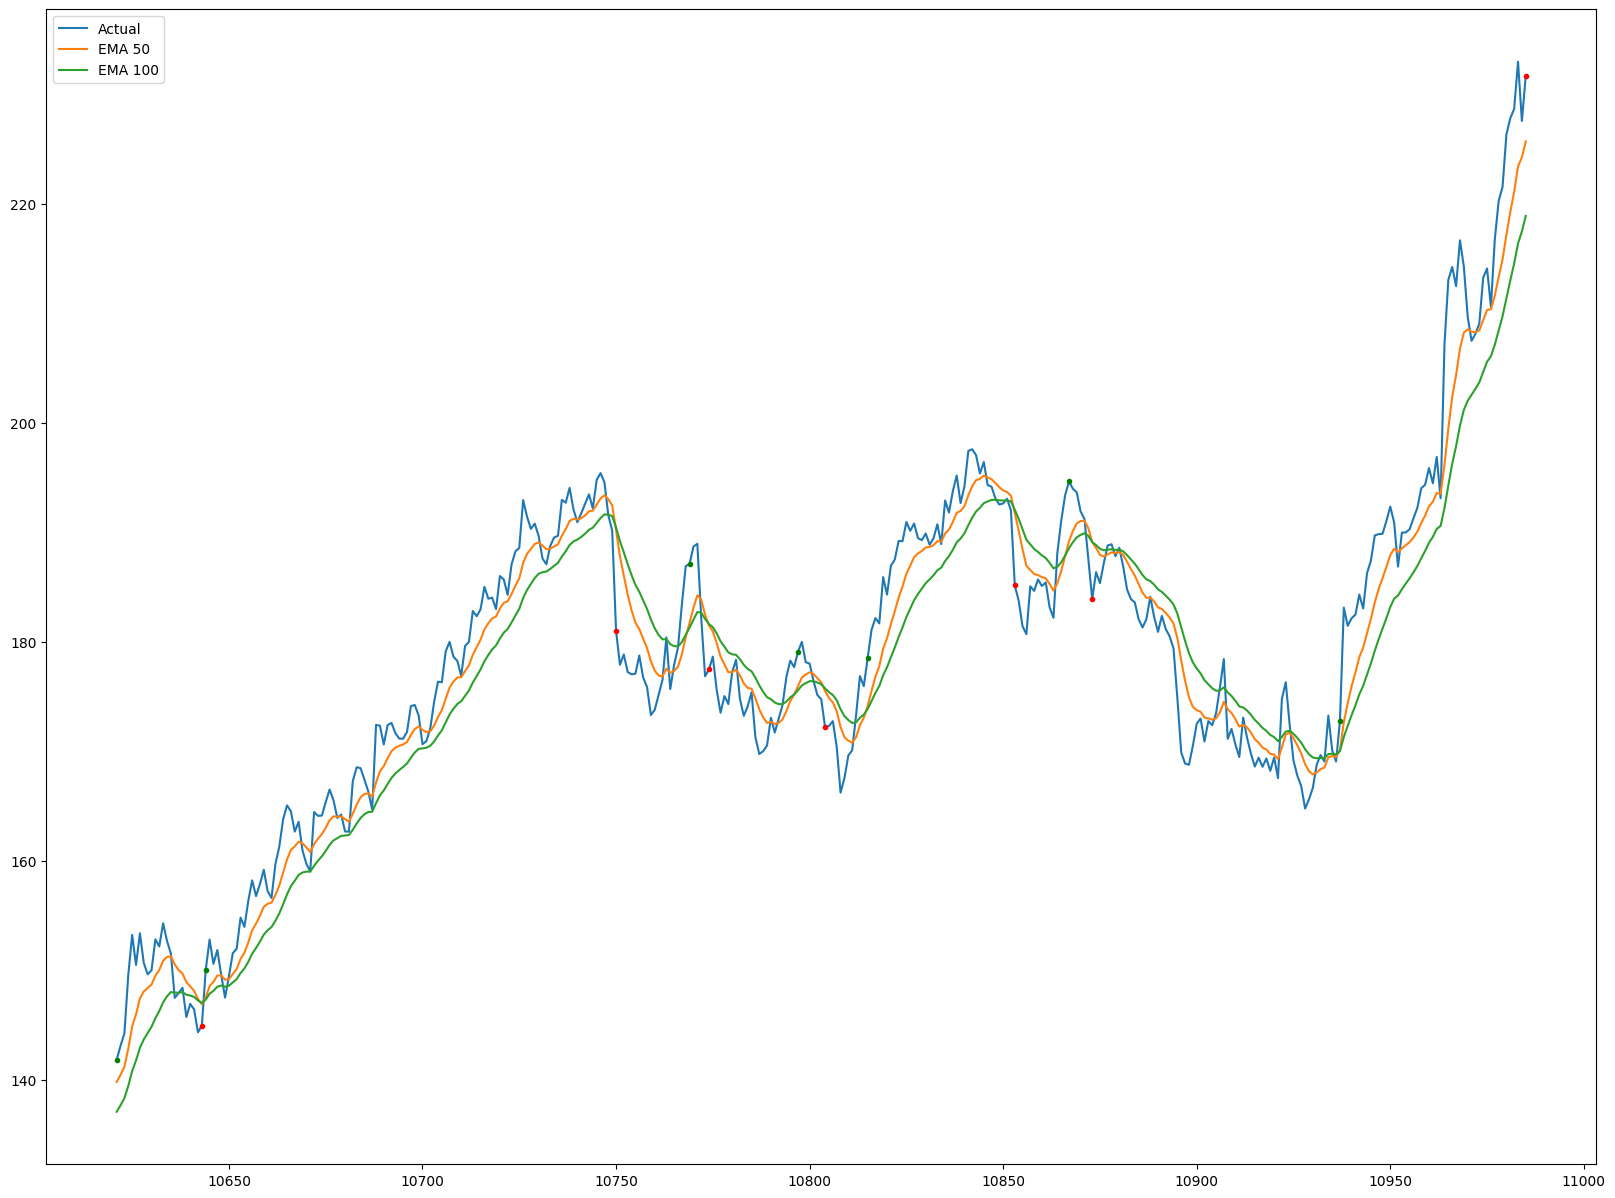

In [15]:
date_number = len(df) - 365

fig = plt.figure(figsize=(20, 15))
plt.plot(df['Close'][date_number:], label="Actual")
plt.plot(df['EMA_1'][date_number:], label=f"EMA {days_1}")
plt.plot(df['EMA_2'][date_number:], label=f"EMA {days_2}")
plt.legend()

net_profit = 0
buy = False
buy_date = None
ctr = 1
for i in range(date_number, len(df)):
  if df['EMA_1'][i] > df['EMA_2'][i] and buy:
    pass
  elif df['EMA_1'][i] < df['EMA_2'][i] and buy:
    profit = df['Close'][i] - df['Close'][buy_date]
    net_profit += profit
    buy = False
    buy_date = None
    ctr+=1
    print(f"Sell on {df['Date'][i]} for {df['Close'][i]:.3f}")
    print(f"Profit : {profit:.3f}")
    print()
    plt.plot(i, df['Close'][i], '.', c='r')
  elif df['EMA_1'][i] > df['EMA_2'][i] and not buy:
    buy = True
    buy_date = i
    print(f"----- {ctr} -----")
    print(f"Buy on {df['Date'][i]} for {df['Close'][i]:.3f}")
    plt.plot(i, df['Close'][i], '.', c='g')
  elif df['EMA_1'][i] < df['EMA_2'][i] and not buy:
    pass
  else:
    pass

if buy == True:
  profit = df['Close'][len(df) - 1] - df['Close'][buy_date]
  print(f"Sell on {df['Date'][len(df) - 1]} for {df['Close'][len(df) - 1]:.3f}")
  print(f"Profit : {profit:.3f}")
  net_profit += profit
  buy = False
  buy_date = None
  ctr+=1
  plt.plot(i, df['Close'][len(df) - 1], '.', c='r')

print()
print("--------------")
print(f"Total profit : {net_profit:.3f}")
print(f"Profit % : {(net_profit / df['Close'][date_number] * 100):.3f} %")